# 数据准备

从文件中读取数据

In [1]:
import pickle
import numpy as np
def read_data(filename):
    x = pickle._Unpickler(open(filename, 'rb'))
    x.encoding = 'latin1'
    data = x.load()
    return data

files = []
for n in range(1, 33): 
    s = ''
    if n < 10:
        s += '0'
    s += str(n)
    files.append(s)
# print(files)

labels = []
data = []
for i in files: 
    fileph = "data_preprocessed_python/s" + i + ".dat"
    d = read_data(fileph)
    labels.append(d['labels'])
    data.append(d['data'])
# print(labels)
# print(data)

将数据转换为array格式

In [2]:
labels = np.array(labels)
data = np.array(data)
print(labels.shape)
print(data.shape)

(32, 40, 4)
(32, 40, 40, 8064)


In [3]:
labels = labels.reshape(1280, 4)
data = data.reshape(1280, 40, 8064)
print(labels.shape)
print(data.shape)

(1280, 4)
(1280, 40, 8064)


# 数据预处理

## 特征提取与特征工程

In [4]:
eeg_data = data[:,:32,:]
print(eeg_data.shape)

(1280, 32, 8064)


PSD特征

In [138]:
from scipy.signal import welch
from scipy.integrate import simps
def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band
    nperseg = (2 / low) * sf
    freqs, psd = welch(data, sf, nperseg=nperseg)
    freq_res = freqs[1] - freqs[0]
    idx_band = np.logical_and(freqs >= low, freqs <= high)
    bp = simps(psd[idx_band], dx=freq_res)
    return bp

def get_band_power(people, channel, band):
    bd = (0,0)
    if (band == "delta"):
        bd = (0.5,4)
    if (band == "theta"):
        bd = (4,8)
    elif (band == "alpha"):
        bd = (8,12)
    elif (band == "beta"):
        bd = (12,30)
    elif (band == "gamma"):
        bd = (30,64)
    return bandpower(eeg_data[people,channel], 128, bd)

In [139]:
eeg_band = []
for i in range (len(eeg_data)):
    for j in range (len(eeg_data[0])):
        eeg_band.append(get_band_power(i,j,"delta"))
        eeg_band.append(get_band_power(i,j,"theta"))
        eeg_band.append(get_band_power(i,j,"alpha"))
        eeg_band.append(get_band_power(i,j,"beta"))
        eeg_band.append(get_band_power(i,j,"gamma"))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [140]:
eeg_band = np.array(eeg_band)
eeg_band = eeg_band.reshape((1280,160)) # 5×32
print(eeg_band.shape)

(1280, 160)


In [4]:
# np.save("eeg_band.npy", eeg_band)
eeg_band = np.load("eeg_band.npy")
print(eeg_band.shape)

(1280, 160)


## 构建Label数据

In [5]:
import pandas as pd
df_label = pd.DataFrame({'Valence': labels[:,0], 'Arousal': labels[:,1], 
                        'Dominance': labels[:,2], 'Liking': labels[:,3]})
df_label

,Valence,Arousal,Dominance,Liking
0,7.71,7.60,6.90,7.83
1,8.10,7.31,7.28,8.47
2,8.58,7.54,9.00,7.08
3,4.94,6.01,6.12,8.06
4,6.96,3.92,7.19,6.05
...,...,...,...,...
1275,3.91,6.96,5.82,3.12
1276,2.81,6.13,6.06,1.04
1277,3.05,7.01,5.10,1.10
1278,3.99,7.17,4.85,1.00


In [6]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Valence    1280 non-null   float64
 1   Arousal    1280 non-null   float64
 2   Dominance  1280 non-null   float64
 3   Liking     1280 non-null   float64
dtypes: float64(4)
memory usage: 40.1 KB


In [7]:
df_label.describe()

,Valence,Arousal,Dominance,Liking
count,1280.000000,1280.000000,1280.000000,1280.000000
mean,5.254313,5.156711,5.382750,5.518133
std,2.130816,2.020499,2.096321,2.282780
min,1.000000,1.000000,1.000000,1.000000
25%,3.867500,3.762500,3.932500,3.960000
50%,5.040000,5.230000,5.240000,6.050000
75%,7.050000,6.950000,7.040000,7.090000
max,9.000000,9.000000,9.000000,9.000000


In [8]:
label_name = ["valence","arousal","dominance","liking"]
labels_valence = []
labels_arousal = []
labels_dominance = []
labels_liking = []
for la in labels:
    l = []
    if la[0]>5:
        labels_valence.append(1)
    else:
        labels_valence.append(0)
    if la[1]>5:
        labels_arousal.append(1)
    else:
        labels_arousal.append(0)
    if la[2]>5:
        labels_dominance.append(1)
    else:
        labels_dominance.append(0)
    if la[3]>6:
        labels_liking.append(1)
    else:
        labels_liking.append(0)

# 模型搭建、训练、测试、优化

In [97]:
# X数据
data_x = eeg_band
print(data_x.shape)
# Y数据
# label_y = labels_valence # 根据需求替换Y数据
label_y = labels_arousal
# label_y = labels_dominance
# label_y = labels_liking
trainscores = []
testscores = []

(1280, 160)


## KNN

In [98]:
X = data_x
from sklearn import preprocessing
# 升维
poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# 降维
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1000)
# X=pca.fit_transform(X)
# print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, label_y)

(1280, 13041)


In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
train_score=knn.score(X_train,y_train)
test_score=knn.score(X_test,y_test)
print("训练集得分：", train_score)
print("测试集得分：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

训练集得分： 0.715625
测试集得分： 0.6125


## SVM

In [100]:
X = data_x
from sklearn import preprocessing
# 升维
poly = preprocessing.PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

# min_max_scaler = preprocessing.MinMaxScaler()
# X=min_max_scaler.fit_transform(X)
X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l2')
print(X.shape)

# 降维
# from sklearn.decomposition import PCA
# pca = PCA(n_components=20)
# X=pca.fit_transform(X)
# print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)

(1280, 13041)


E:\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [101]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',C = 0.1)
svc.fit(X_train, y_train)
train_score=svc.score(X_train,y_train)
test_score=svc.score(X_test,y_test)
print("训练集得分：", train_score)
print("测试集得分：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

训练集得分： 0.5822916666666667
测试集得分： 0.55625


In [102]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# parameters = {'kernel':['linear','rbf','poly','sigmoid'], 
#               'C':[0.1,1,5,10,50,100],'gamma':[0.0001,0.001,0.01,0.1]}
# svc = SVC()
# grid = GridSearchCV(svc, parameters, cv=3) # grid
# grid.fit(X_train, y_train)
# print("支持向量机的最优超参数组合：",grid.best_params_)
# svm=grid.best_estimator_
# svm=svm.fit(X_train,y_train)   
# train_score=svm.score(X_train,y_train)
# test_score=svm.score(X_test,y_test)  
# trainscores.append(train_score)
# testscores.append(test_score)

## 决策树

In [103]:
X = data_x
from sklearn import preprocessing
# 升维
# poly = preprocessing.PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# 降维
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
X=pca.fit_transform(X)
print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)

(1280, 160)
(1280, 100)


In [104]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=20,min_samples_split=4)
dtree = dtree.fit(X_train, y_train)
train_score=dtree.score(X_train,y_train)
test_score=dtree.score(X_test,y_test)
print("训练集得分：", train_score)
print("测试集得分：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

训练集得分： 0.9875
测试集得分： 0.565625


## 随机森林

In [105]:
X = data_x
from sklearn import preprocessing
# 升维
# poly = preprocessing.PolynomialFeatures(degree=2)
# X = poly.fit_transform(X)

min_max_scaler = preprocessing.MinMaxScaler()
X=min_max_scaler.fit_transform(X)
# X=preprocessing.scale(X)
# X = preprocessing.normalize(X, norm='l1')
print(X.shape)

# 降维
# from sklearn.decomposition import PCA
# pca = PCA(n_components=100)
# X=pca.fit_transform(X)
# print(X.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_x, label_y)

(1280, 160)


In [106]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=50,max_depth=20,min_samples_split=5)
rf=rf.fit(X_train, y_train)
train_score=rf.score(X_train,y_train)
test_score=rf.score(X_test,y_test)
print("训练集得分：", train_score)
print("测试集得分：", test_score)
trainscores.append(train_score)
testscores.append(test_score)

训练集得分： 0.9947916666666666
测试集得分： 0.575


# 模型比较

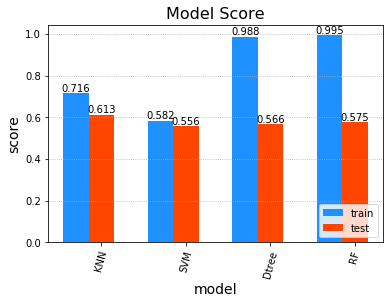

In [107]:
#绘制得分条形图
model_name = ["KNN","SVM","Dtree","RF"]
import matplotlib.pyplot as plt
plt.title('Model Score', fontsize=16)
plt.xlabel('model', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(linestyle=':', axis='y')
x = np.arange(4)
a = plt.bar(x - 0.3, trainscores, 0.3, color='dodgerblue', label='train', align='center')
b = plt.bar(x, testscores, 0.3, color='orangered', label='test', align='center')
# 设置标签
for i in a + b:
    h = i.get_height()
    plt.text(i.get_x() + i.get_width() / 2, h, '%.3f' % h, ha='center', va='bottom')
plt.xticks(x,model_name,rotation=75)
plt.legend(loc='lower right')
plt.show()